### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets


### Importing the Iris Flower dataset

In [2]:
data=datasets.load_iris()
dir(data)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [3]:
import pandas as pd
df=pd.DataFrame(data.data,columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Finding the optimum number of clusters fro K-means classification

In [5]:
from sklearn.cluster import KMeans

In [6]:
x = df.iloc[:, [0,1,2,3]].values

In [7]:
Kmeans5=KMeans(n_clusters=5)
ymeans5=Kmeans5.fit_predict(x)
ymeans5

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3,
       2, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 4, 3, 0, 4, 4, 0, 2, 0, 4, 0,
       4, 4, 4, 3, 4, 4, 4, 0, 0, 3, 4, 3, 0, 3, 4, 0, 3, 3, 4, 0, 0, 0,
       4, 3, 3, 0, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3])

In [8]:
Kmeans5.cluster_centers_

array([[7.475     , 3.125     , 6.3       , 2.05      ],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.53214286, 2.63571429, 3.96071429, 1.22857143],
       [6.24722222, 2.84722222, 4.775     , 1.575     ],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ]])

### K_Means for n_clusters=5

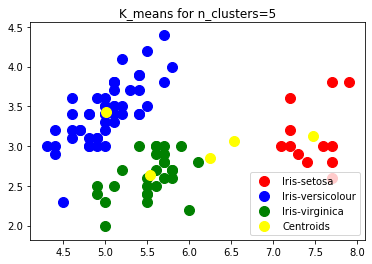

In [9]:
plt.scatter(x[ymeans5 == 0, 0], x[ymeans5 == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[ymeans5 == 1, 0], x[ymeans5 == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[ymeans5 == 2, 0], x[ymeans5 == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')


plt.scatter(Kmeans5.cluster_centers_[:, 0], Kmeans5.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.title('K_means for n_clusters=5')

plt.legend()


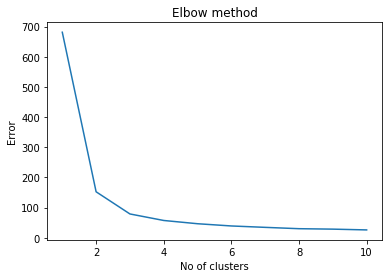

In [10]:
x = df.iloc[:, [0,1,2,3]].values
error=[]

for i in range (1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    error.append(kmeans.inertia_)
plt.plot(range(1, 11), error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

##### You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (Error) doesn't decrease significantly with every iteration.
##### From this we choose K=3

In [11]:
Kmeans3=KMeans(n_clusters=3,max_iter=300,random_state=0)
ymeans3=Kmeans3.fit_predict(x)
ymeans3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

### K-Means 

In [12]:
df['k_means']=Kmeans3.predict(x)
df['target']=data['target']




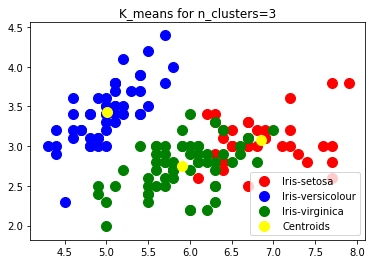

In [13]:
plt.scatter(x[ymeans3 == 0, 0], x[ymeans3 == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[ymeans3 == 1, 0], x[ymeans3 == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[ymeans3 == 2, 0], x[ymeans3 == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')


plt.scatter(Kmeans3.cluster_centers_[:, 0], Kmeans3.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.title('K_means for n_clusters=3')

plt.legend()


### Actual without K_Means

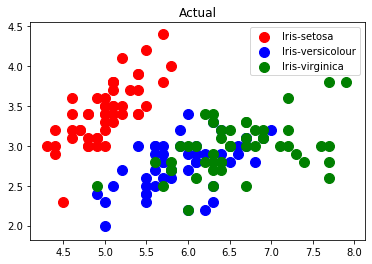

In [14]:
plt.scatter(x[data['target'] == 0, 0], x[data['target'] == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[data['target'] == 1, 0], x[data['target'] == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[data['target'] == 2, 0], x[data['target'] == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')



plt.title('Actual')

plt.legend()


## Comparing the above two plots(Actual with the K_Means for n_cluster=3) , we can see that  the K-means does a really good job defining the clusters of the dataset.